<a href="https://colab.research.google.com/github/roolzpolo/Image_and_text/blob/main/parte_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
os.chdir('/content/drive/My Drive/Colab Notebooks/')
!ls

bici_data.ipynb  parte_3.ipynb	portfolio_opt.ipynb  tw_source.csv  Untitled0.ipynb


In [7]:
import pandas as pd
column_names = ['ID', 'Timestamp', 'Query', 'User', 'Tweet']
df = pd.read_csv('tw_source.csv', encoding='ISO-8859-1', names=column_names, header=None)
df.head()

,ID,Timestamp,Query,User,Tweet
0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [18]:
# Contar tweets por usuario
user_tweet_counts = df['User'].value_counts()


top_3_users = user_tweet_counts.head(3)
print("Los 3 usuarios más populares son:")
print(top_3_users)


Los 3 usuarios más populares son:
User
lost_dog    549
webwoke     345
tweetpet    310
Name: count, dtype: int64


In [19]:
# Diccionario para almacenar los corpus
corpora = {}

for user in top_3_users.index:
    # Filtrar los tweets del usuario
    user_data = df[df['User'] == user].copy()

    # Calcular la longitud de cada tweet
    user_data['length'] = user_data['Tweet'].apply(len)

    # Almacenar en el diccionario
    corpora[user] = {
        'tweets': user_data['Tweet'].tolist(),
        'metadata': user_data[['ID', 'Timestamp', 'length']]
    }


In [22]:
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

def preprocess_text(text):
    # Convertir a minúsculas
    text = text.lower()

    # Remover URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # Remover menciones (@usuario)
    text = re.sub(r'@\w+', '', text)

    # Remover caracteres especiales y números
    text = re.sub(r'[^A-Za-z\s]', '', text)

    # Tokenizar el texto
    tokens = word_tokenize(text)

    # Remover stopwords
    tokens = [word for word in tokens if word not in stopwords.words('english')]

    # Stemming
    ps = PorterStemmer()
    tokens = [ps.stem(word) for word in tokens]

    # Lematización
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Unir tokens en una cadena
    processed_text = ' '.join(tokens)

    return processed_text


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [24]:
for user in corpora.keys():
    processed_tweets = []
    for tweet in corpora[user]['tweets']:
        processed = preprocess_text(tweet)
        processed_tweets.append(processed)
    corpora[user]['processed_tweets'] = processed_tweets

# Ver algunos tweets procesados de un usuario
sample_user = list(corpora.keys())[0]  # Seleccionar el primer usuario
print(f"Tweets procesados del usuario {sample_user}:")
for tweet in corpora[sample_user]['processed_tweets'][:5]:
    print(tweet)




Tweets procesados del usuario lost_dog:
lost plea help find good home
lost plea help find good home
lost plea help find good home
lost plea help find good home
lost plea help find good home


In [25]:
def generate_wordcloud(text, user):
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white',
        stopwords=STOPWORDS,
        max_words=100,
        max_font_size=80,
        random_state=42
    ).generate(text)

    plt.figure(figsize=(15, 7.5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'WordCloud for {user}', fontsize=20)
    plt.show()


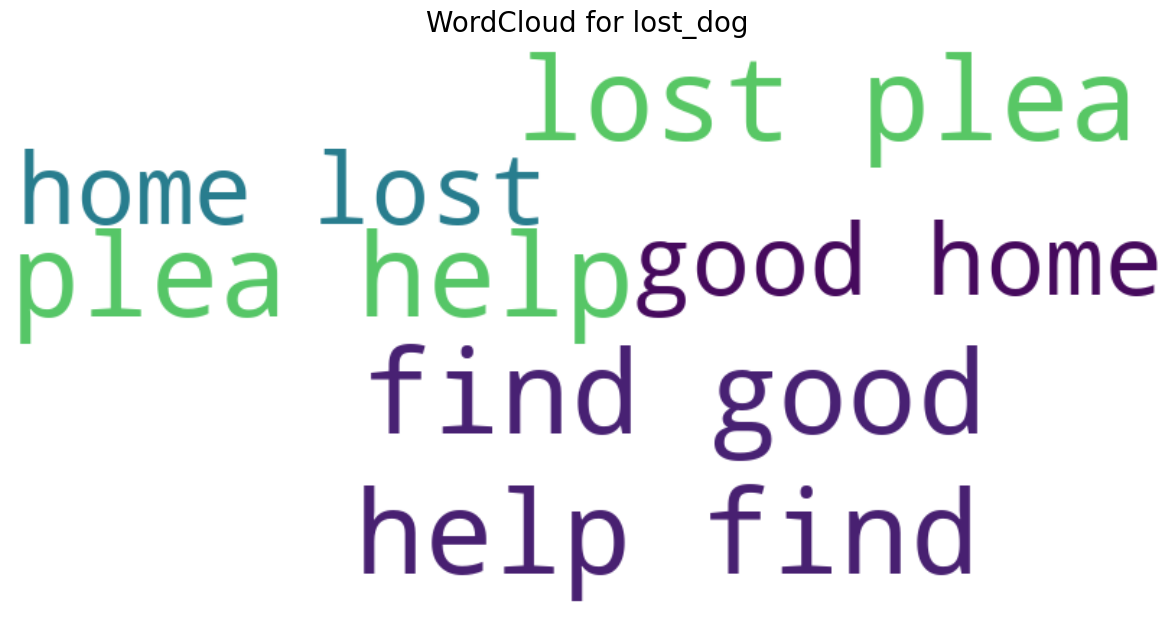

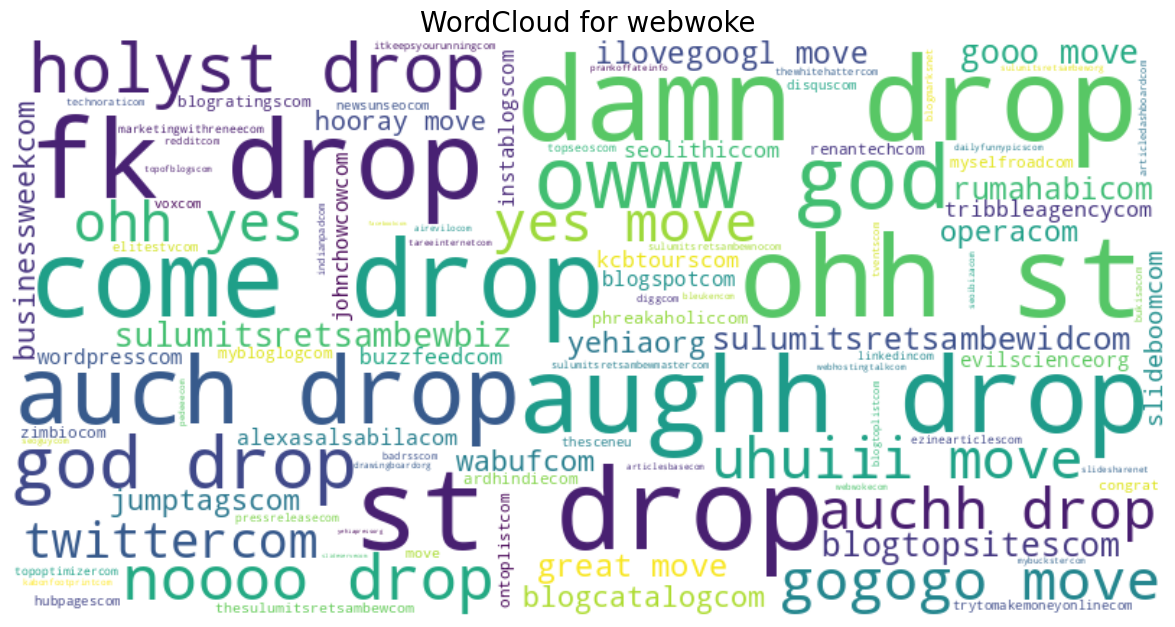

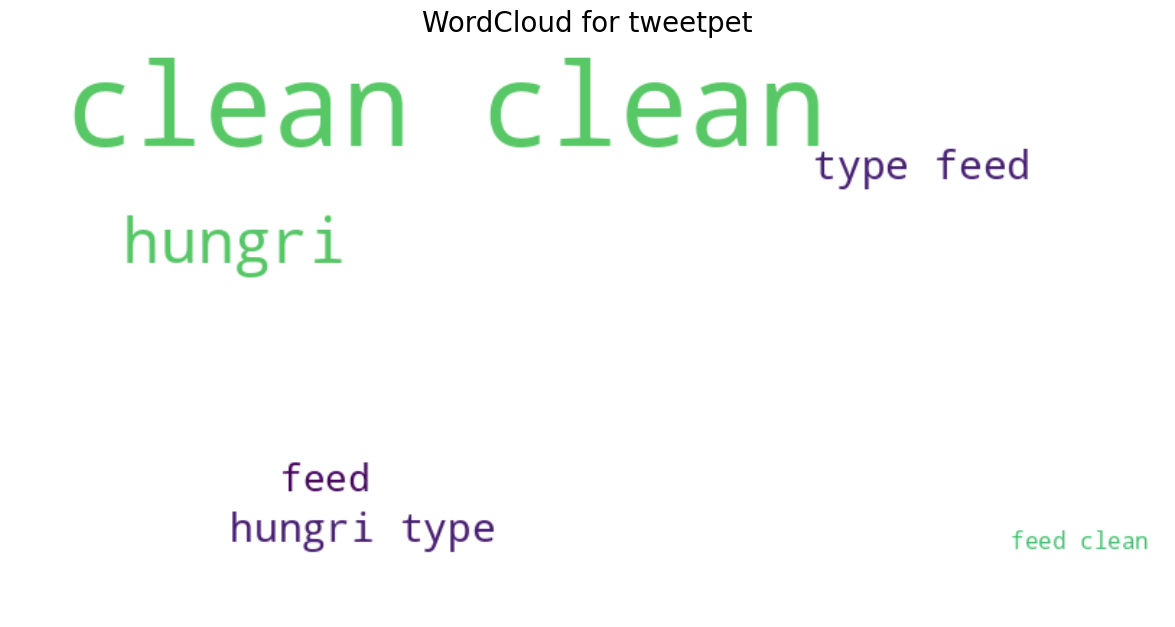

In [27]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

for user in corpora.keys():
    text = ' '.join(corpora[user]['processed_tweets'])
    generate_wordcloud(text, user)


In [28]:
from collections import Counter

def get_top_words(processed_tweets, n=10):
    all_words = ' '.join(processed_tweets).split()
    word_counts = Counter(all_words)
    return word_counts.most_common(n)

for user in corpora.keys():
    top_words = get_top_words(corpora[user]['processed_tweets'])
    print(f"Palabras más comunes en los tweets de {user}:")
    for word, count in top_words:
        print(f"{word}: {count}")
    print("\n")


Palabras más comunes en los tweets de lost_dog:
lost: 549
plea: 549
help: 549
find: 549
good: 549
home: 549


Palabras más comunes en los tweets de webwoke:
drop: 264
move: 81
ohh: 48
damn: 37
st: 35
fk: 32
come: 31
aughh: 30
auch: 24
owww: 23


Palabras más comunes en los tweets de tweetpet:
clean: 285
hungri: 25
feed: 12
type: 6




1. Usuarios Más Populares

Los tres usuarios más populares en términos de cantidad de tweets son:

lost_dog con 549 tweets.
webwoke con 345 tweets.
tweetpet con 310 tweets.
Estos usuarios representan una muestra significativa del dataset y sus tweets abarcan diferentes temáticas, como se evidencia en los análisis de las palabras más comunes.

2. Palabras Más Comunes por Usuario

lost_dog:
Las palabras más frecuentes son: lost, plea, help, find, good, home, cada una apareciendo 549 veces.
Análisis: Este usuario parece centrarse en mensajes relacionados con la búsqueda de algo o alguien perdido, probablemente un perro, dado su nombre de usuario. Las palabras "help" (ayuda) y "find" (encontrar) refuerzan esta hipótesis.
webwoke:
Las palabras más frecuentes son: drop, move, ohh, damn, st, fk, come, aughh, auch, owww.
Análisis: Este usuario muestra un patrón de comunicación más informal y emocional, con expresiones como "ohh", "damn", y "fk". El uso de palabras como "drop" y "move" sugiere actividad o movimiento, aunque el contexto exacto no está claro sin más análisis.
tweetpet:
Las palabras más frecuentes son: clean, hungr, feed, type.
Análisis: Este usuario parece enfocado en temas relacionados con la alimentación y limpieza, posiblemente de una mascota, lo que se alinea con su nombre de usuario. Palabras como "clean" y "feed" apuntan a actividades cotidianas de cuidado.
3. Observaciones Generales

Diversidad de Temáticas: Cada uno de los usuarios analizados tiene un enfoque temático claro y distinto. lost_dog se centra en la búsqueda y ayuda, webwoke en la expresión emocional y posiblemente en la actividad física o social, y tweetpet en el cuidado de una mascota.
Estilo de Comunicación: Los estilos de comunicación varían significativamente entre los usuarios. Mientras que lost_dog parece más serio y directo en su mensaje, webwoke utiliza un lenguaje más informal y emocional, y tweetpet parece práctico y orientado a tareas.
4. Aplicaciones Prácticas

Segmentación de Audiencias: Estos resultados podrían ser útiles para segmentar audiencias y personalizar mensajes. Por ejemplo, una campaña dirigida a lost_dog podría enfocarse en servicios de búsqueda y rescate, mientras que tweetpet podría ser más receptivo a productos de limpieza y alimentación para mascotas.
Análisis de Sentimientos: Si se aplicara un análisis de sentimientos, podríamos profundizar en el tono emocional de los tweets, especialmente en usuarios como webwoke, donde las emociones parecen jugar un rol importante.